In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank-loan.csv")
df.head(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [3]:
df.shape

(850, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [6]:
df.default.value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [7]:
df['default'] = df['default'].fillna(0.0)

In [8]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [9]:
feature = ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt','othdebt',]
X = df[feature] # Features
y = df.default # Target variable

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [11]:
logreg = LogisticRegression()

In [12]:
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [13]:
X_train

,age,ed,employ,address,income,debtinc,creddebt,othdebt
560,33,2,10,4,26,3.1,0.030628,0.775372
544,38,3,13,18,25,5.7,0.343425,1.081575
833,47,1,16,19,110,12.6,5.821200,8.038800
657,35,1,16,10,57,10.5,1.143135,4.841865
208,36,1,14,11,81,7.2,1.784592,4.047408
...,...,...,...,...,...,...,...,...
166,22,1,4,2,24,15.6,1.636128,2.107872
520,35,3,7,5,38,15.1,1.382858,4.355142
179,33,2,2,14,35,22.9,2.123975,5.891025
817,38,2,0,18,21,4.6,0.612444,0.353556


In [14]:
X_test

,age,ed,employ,address,income,debtinc,creddebt,othdebt
91,25,1,1,6,15,11.4,0.371070,1.338930
328,29,1,1,8,31,8.0,0.156240,2.323760
87,37,3,5,17,29,24.6,1.405398,5.728602
463,31,2,9,1,30,5.8,0.602040,1.137960
90,32,1,3,10,23,6.2,0.052762,1.373238
...,...,...,...,...,...,...,...,...
507,25,1,9,2,20,3.5,0.105000,0.595000
640,41,1,1,16,19,4.4,0.241604,0.594396
836,41,2,13,1,93,14.7,9.542358,4.128642
759,27,1,6,2,52,13.8,1.901640,5.274360


In [15]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[198,   7],
       [ 37,  13]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

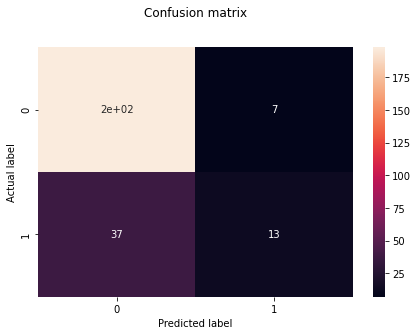

In [16]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8274509803921568
Precision: 0.65
Recall: 0.26
